# Problem 1
Read carefully the article at https://dustinstansbury.github.io/theclevermachine/bias-variance-tradeoff. We will review this in Lab 2.
Let $y(x) = f(x) + ε$ be the measured relationship and $\hat{y} = g(x)$ be the model predicted value of $y$. Then MSE over test instance $x_i, i = 1,...,t,$ is given by:

$MSE = \frac{1}{t} \sum_{i=1}^{t} (f(x_i) + ε − g(x_i))^2$



Recall that the expected mean squared error of a regression problem can be written as
$E[MSE] = Bias2 + V ariance + Noise$


### 1-
Consider the case when $f (x) = x + sin(1.5x)$ and $y(x) = f (x) + N (0, 0.3)$, where$ N (0, 0.3)$ is normal distribution with mean 0 and standard deviation 0.3. Create a dataset of size 20 points by randomly generating samples from y. Display the dataset and $f(x)$. Use scatter plot for y and smooth line plot for $f(x)$.

In [58]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

def f_x(x):
    return x+mt.sin(1.5*x)

def y_x(x):
    return f_x(x)+ np.random.normal(0, 0.3, 1)[0]

np.random.seed(42069)

x_sample = np.random.uniform(0,5,20)

data_f = [ f_x(i) for i in x_sample]

data_y = [i+ np.random.normal(0, 0.3, 1)[0] for i in data_f]

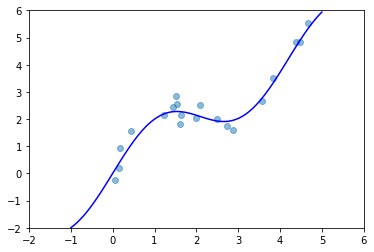

In [59]:
x = np.linspace(-1,5,100)

y = [f_x(i) for i in x]
plt.plot(x,y, 'b')
plt.scatter(x_sample, data_y, alpha=0.5)
plt.xlim([-2, 6])
plt.ylim([-2, 6])
plt.show()

In [65]:
### From the website ??

# import numpy as np
# MARKER_SIZE = 100
# DATA_COLOR = 'black'
# ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange', 'royalblue', 'darkgreen','red']
# LEGEND_FONTSIZE = 14
# TITLE_FONTISIZE = 16
# N_OBSERVATIONS = 20
# NOISE_STD = .3

# x = 2 * (np.random.rand(N_OBSERVATIONS) - .5)
# x_grid = np.linspace(-1, 1, 100)


# def f(x):
#     """Base function"""
#     return x+ np.sin(x * 1.5)


# def sample_fx_data(shape, noise_std=NOISE_STD):
#     return f(x) + np.random.randn(*shape) * noise_std


# def plot_fx_data(y=None):
#     """Plot f(x) and noisy samples"""
#     y = y if y is not None else sample_fx_data(x.shape)
#     fig, axs = plt.subplots(figsize=(6, 6))
#     plt.plot(x_grid, f(x_grid), color=DATA_COLOR, label='f(x)')
#     plt.scatter(x, y, s=MARKER_SIZE, edgecolor=DATA_COLOR, facecolors='none', label='y')


# # Plot the data
# y = sample_fx_data(x.shape)
# plot_fx_data(y)
# plt.legend(fontsize=14)
# plt.title(f'$f(x) = x + sin(1.5 \dot x)$ and some observations, $y$', fontsize=16)
# plt.xlim([-1, 1])
# plt.ylim([-2, 2])

### 2-
Use weighted sum of polynomials as an estimator function for f(x), in particular, let the form of estimator function be:
*$g_n(x)=β0 +β1x+β2x_2 +.....+β_nx_n$
Consider four candidate estimators, $g_1,g_3,g_5, and g_{10}$. Estimate the coefficients of each of the four estimators using the sampled dataset and plot $y(x),f(x),g1(x),g3(x),g10(x)$. Which estimator is underfitting ? Which one is overfitting ?

ValueError: x and y must have same first dimension, but have shapes (20,) and (2,)

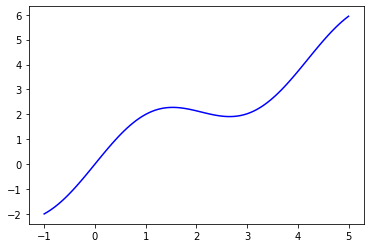

In [61]:
# # x = np.linspace(-np.pi,np.pi,100)
# x_grid = np.linspace(-1, 1, 100)
# y = [f_x(i) for i in x]
# plt.plot(x,y, 'b')
# plt.plot(data_f,np.polyfit(data_f, data_y, 1), 'b')


# plt.scatter(x_sample, data_y, alpha=0.5)
# plt.xlim([-0.5, 2.5])
# plt.ylim([-0.5, 2.5])
# plt.show()

Text(0.5, 1.0, 'Various Polynomial Functions Fit to Observations')

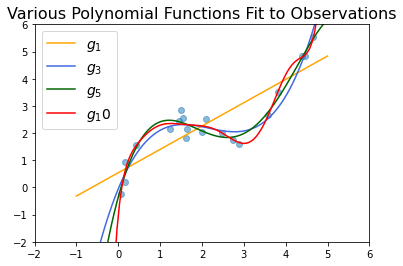

In [72]:
plt.scatter(x_sample, data_y, alpha=0.5)

polynomial_degrees = [1, 3, 5,10]
theta = {}
fit = {}
for ii, degree in enumerate(polynomial_degrees):
    # Note: we should get an overconditioned warning for degree 10 because of extreme overfitting
    theta[degree] = np.polyfit(x_sample, data_y, degree)
    fit[degree] = np.polyval(theta[degree], x)
    plt.plot(x, fit[degree], POLYNOMIAL_FIT_COLORS[ii], label=f"$g_{str(degree)}$")
plt.legend(fontsize=LEGEND_FONTSIZE)
plt.xlim([-2, 6])
plt.ylim([-2, 6])
plt.title("Various Polynomial Functions Fit to Observations", fontsize=TITLE_FONTISIZE)

### 3. 
Generate 100 datasets (each of size 50) by randomly sampling from y.

(a) Next fit the estimators of varying complexity, i.e., g1 , g2 , ....g15 using the training set for each dataset. Then calculate and plot the squared bias, variance, and error on testing set for each of the estimators showing the tradeoff between bias and variance with model complexity. 

(b) Identify the best model, i.e., the model with the smallest Mean Squared Error. What is the value of bias and variance for this model?

In [73]:
dataset = [[ y_x(np.random.uniform(0,5,1))for i in range(50)] for i in range(100)]

20


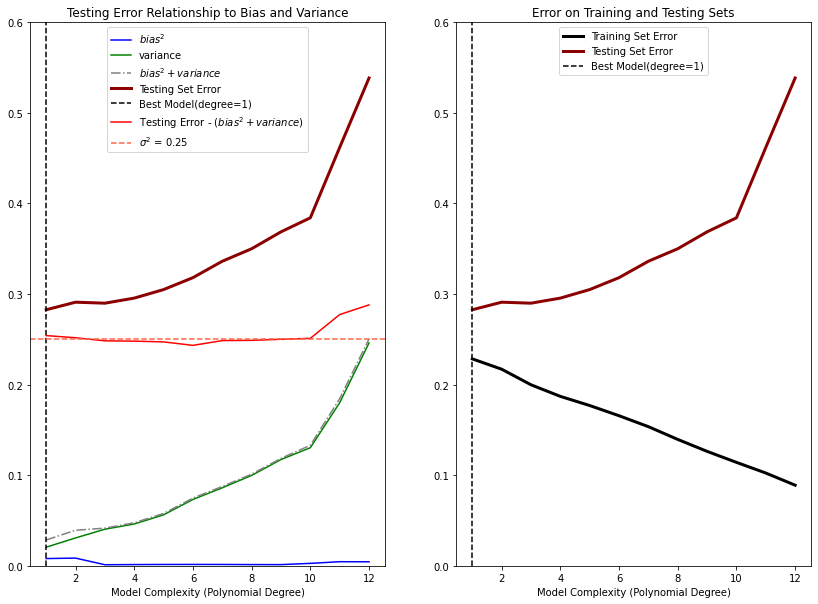

In [87]:
from collections import defaultdict

def error_function(pred, actual):
    return (pred - actual) ** 2

np.random.seed(124)
n_observations_per_dataset = 25
n_datasets = 100
max_poly_degree = 12  # Maximum model complexity
model_poly_degrees = range(1, max_poly_degree + 1)

NOISE_STD = .5
percent_train = .8
n_train = int(np.ceil(n_observations_per_dataset * percent_train))
print(n_train)
# Create training/testing inputs
x = np.linspace(-1, 1, n_observations_per_dataset)
x = np.random.permutation(x)
x_train = x[:n_train]
x_test = x[n_train:]

# logging variables
theta_hat = defaultdict(list)

pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

# Loop over datasets
for dataset in range(n_datasets):

    # Simulate training/testing targets
    y_train = f(x_train) + NOISE_STD * np.random.randn(*x_train.shape)
    y_test = f(x_test) + NOISE_STD * np.random.randn(*x_test.shape)

    # Loop over model complexities
    for degree in model_poly_degrees:
        # Train model
        tmp_theta_hat = np.polyfit(x_train, y_train, degree)

        # Make predictions on train set
        tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
        pred_train[degree].append(tmp_pred_train)

        # Test predictions
        tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
        pred_test[degree].append(tmp_pred_test)

        # Mean Squared Error for train and test sets
        train_errors[degree].append(np.mean(error_function(tmp_pred_train, y_train)))
        test_errors[degree].append(np.mean(error_function(tmp_pred_test, y_test)))


def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - f(x_test)) ** 2)


def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)


complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in model_poly_degrees:
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

best_model_degree = model_poly_degrees[np.argmin(complexity_test_error)]


# Visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 10))

## Plot Bias^2 + variance
plt.sca(axs[0])
plt.plot(model_poly_degrees, bias_squared, color='blue', label='$bias^2$')
plt.plot(model_poly_degrees, variance, color='green', label='variance')
plt.plot(model_poly_degrees, np.array(bias_squared) + np.array(variance),  linestyle='-.', color='gray', label='$bias^2 + variance$')
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.plot(model_poly_degrees, np.array(complexity_test_error) - (np.array(bias_squared) + np.array(variance)), color='red', label='Testing Error - ($bias^2 + variance$)')
plt.axhline(NOISE_STD **2, color='tomato', linestyle='--', label=f'$\sigma^{2}$ = {round(NOISE_STD**2, 3)}')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylim([0, .6]);
plt.legend()
plt.title('Testing Error Relationship to Bias and Variance')

## Plot Train / Test Set Error
plt.sca(axs[1])
plt.plot(model_poly_degrees, complexity_train_error, label='Training Set Error', linewidth=3, color=DATA_COLOR)
plt.plot(model_poly_degrees, complexity_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})')
plt.ylim([0, .6]);
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Error on Training and Testing Sets')
plt.legend(loc='upper center')

In [88]:
import string
import secrets
alphabet = string.ascii_letters + string.digits
password = ''.join(secrets.choice(alphabet) for i in range(8))

In [90]:
alphabet

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'